In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
dl1 = pd.read_csv('diabetes.csv')
print("First 10 rows of the dataset are:")
dl1.head(10)


First 10 rows of the dataset are:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


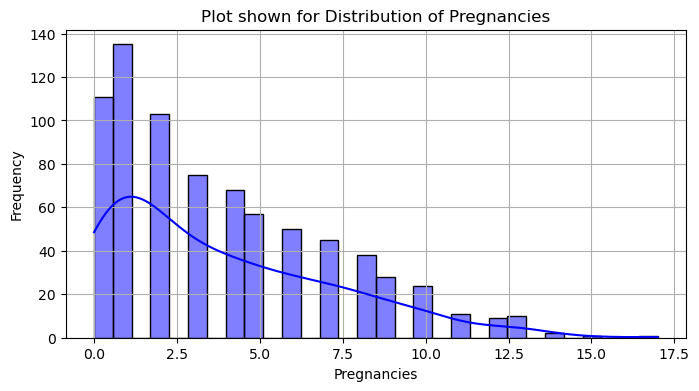

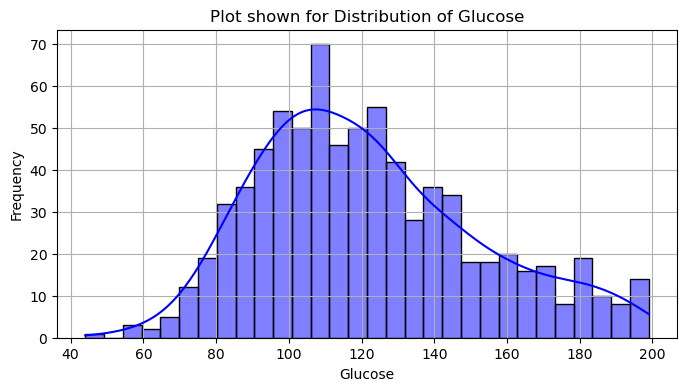

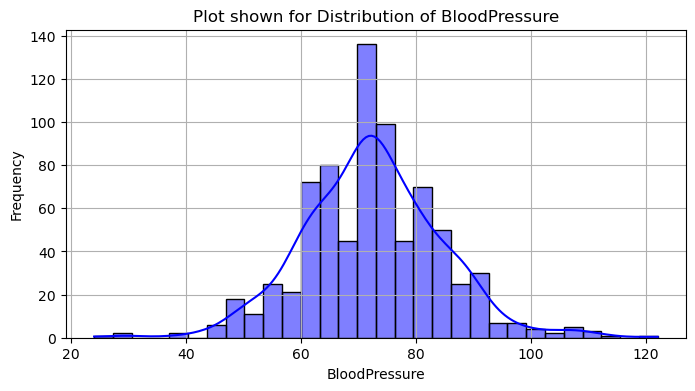

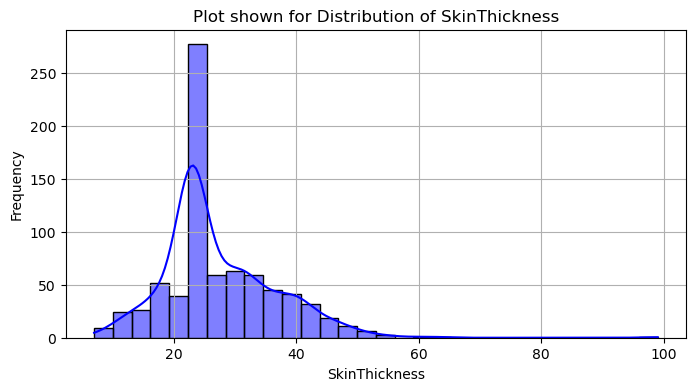

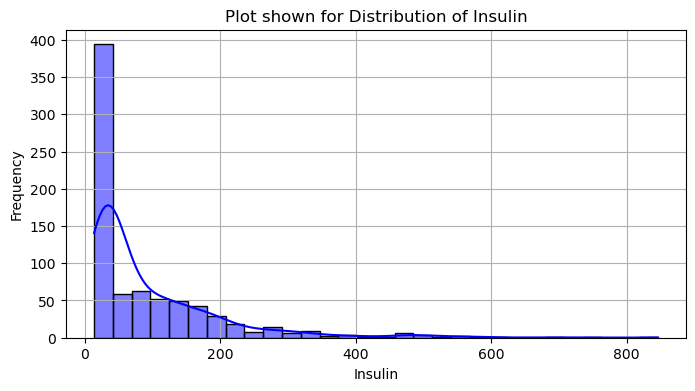

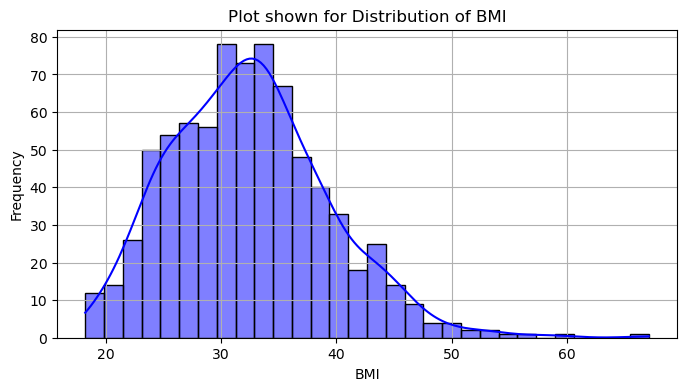

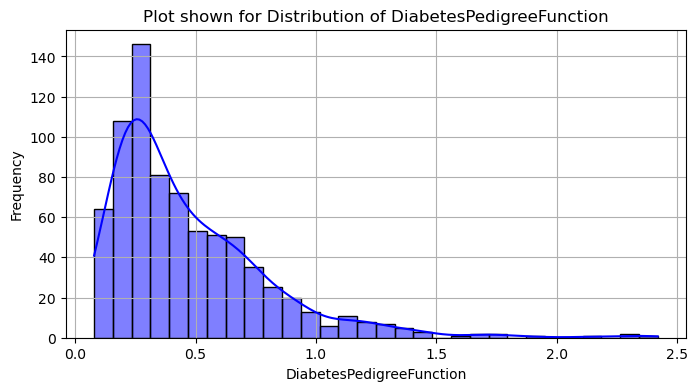

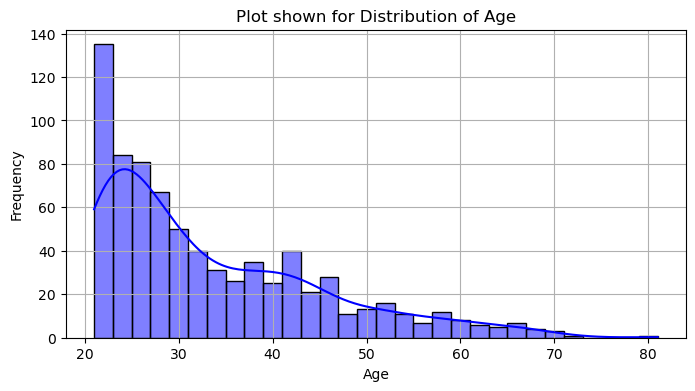

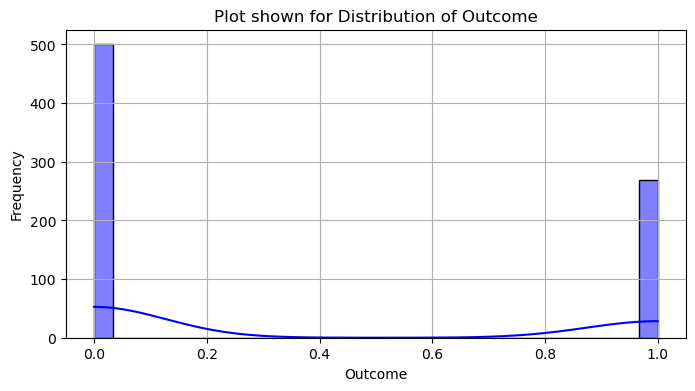

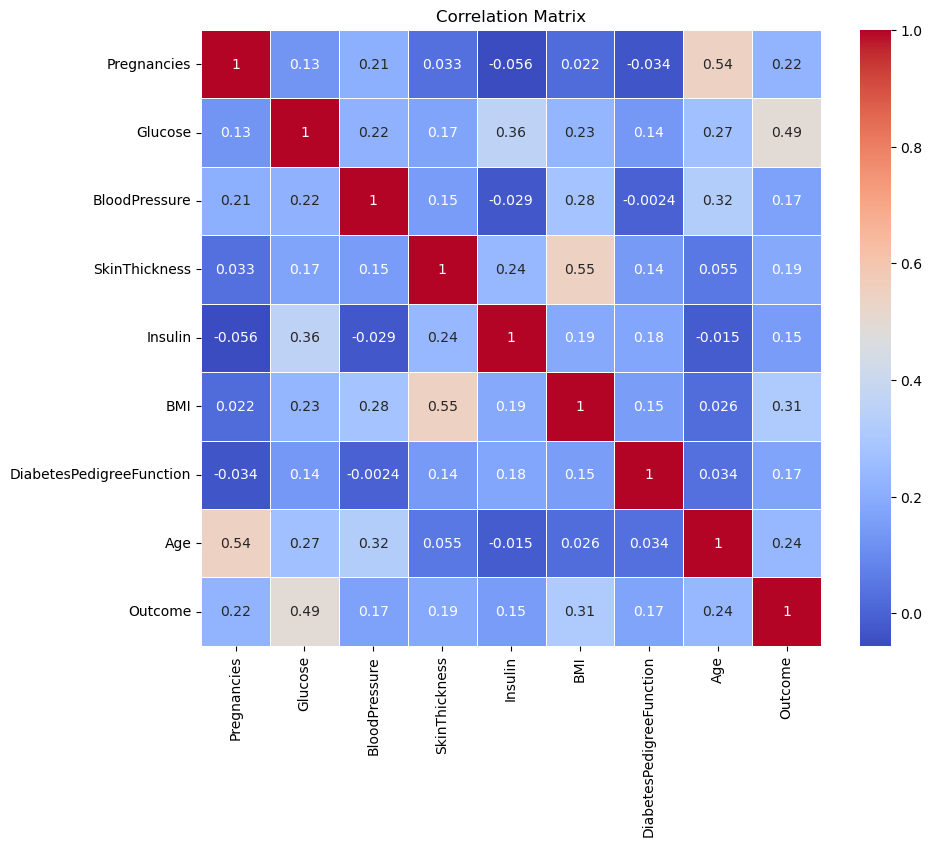

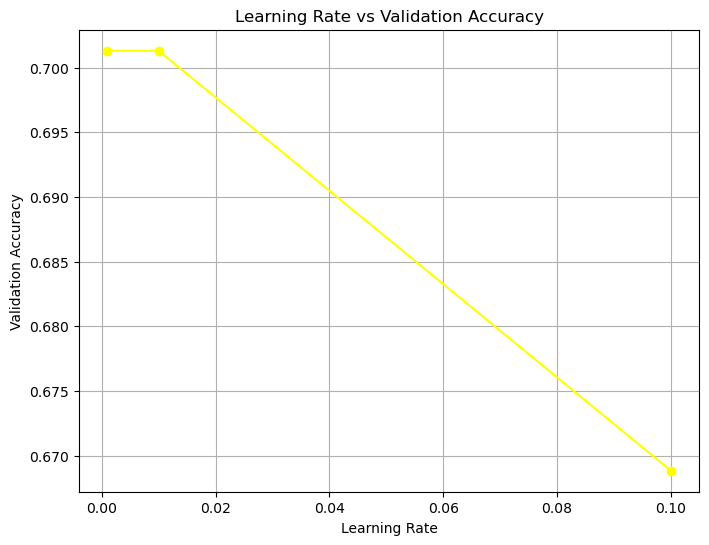

Test Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       102
           1       0.51      0.46      0.48        52

    accuracy                           0.67       154
   macro avg       0.62      0.62      0.62       154
weighted avg       0.66      0.67      0.66       154



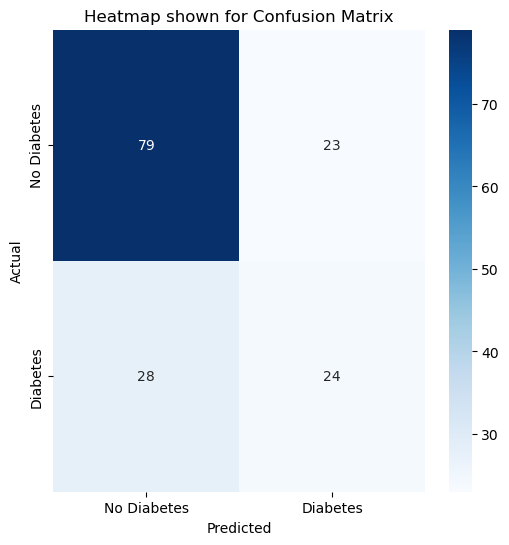

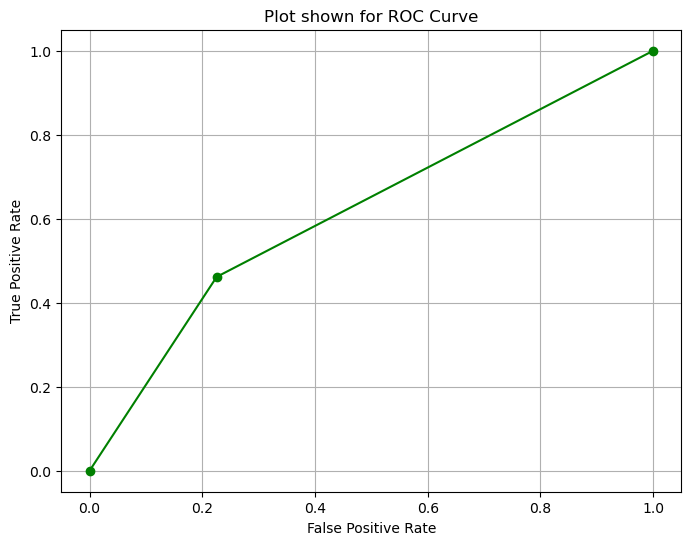

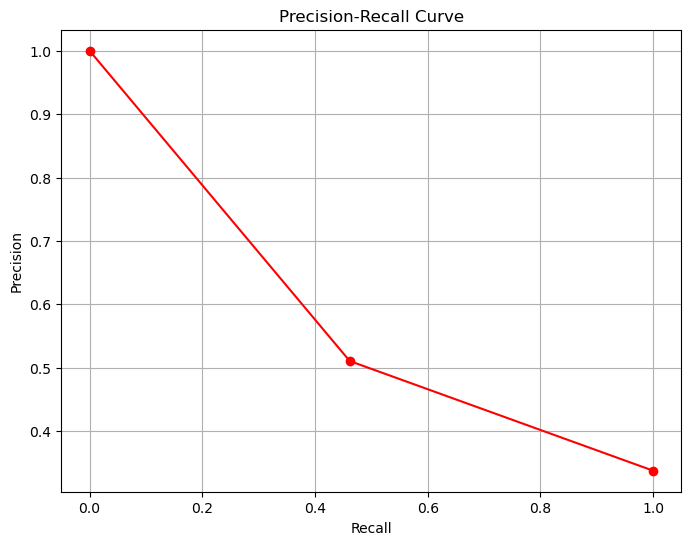

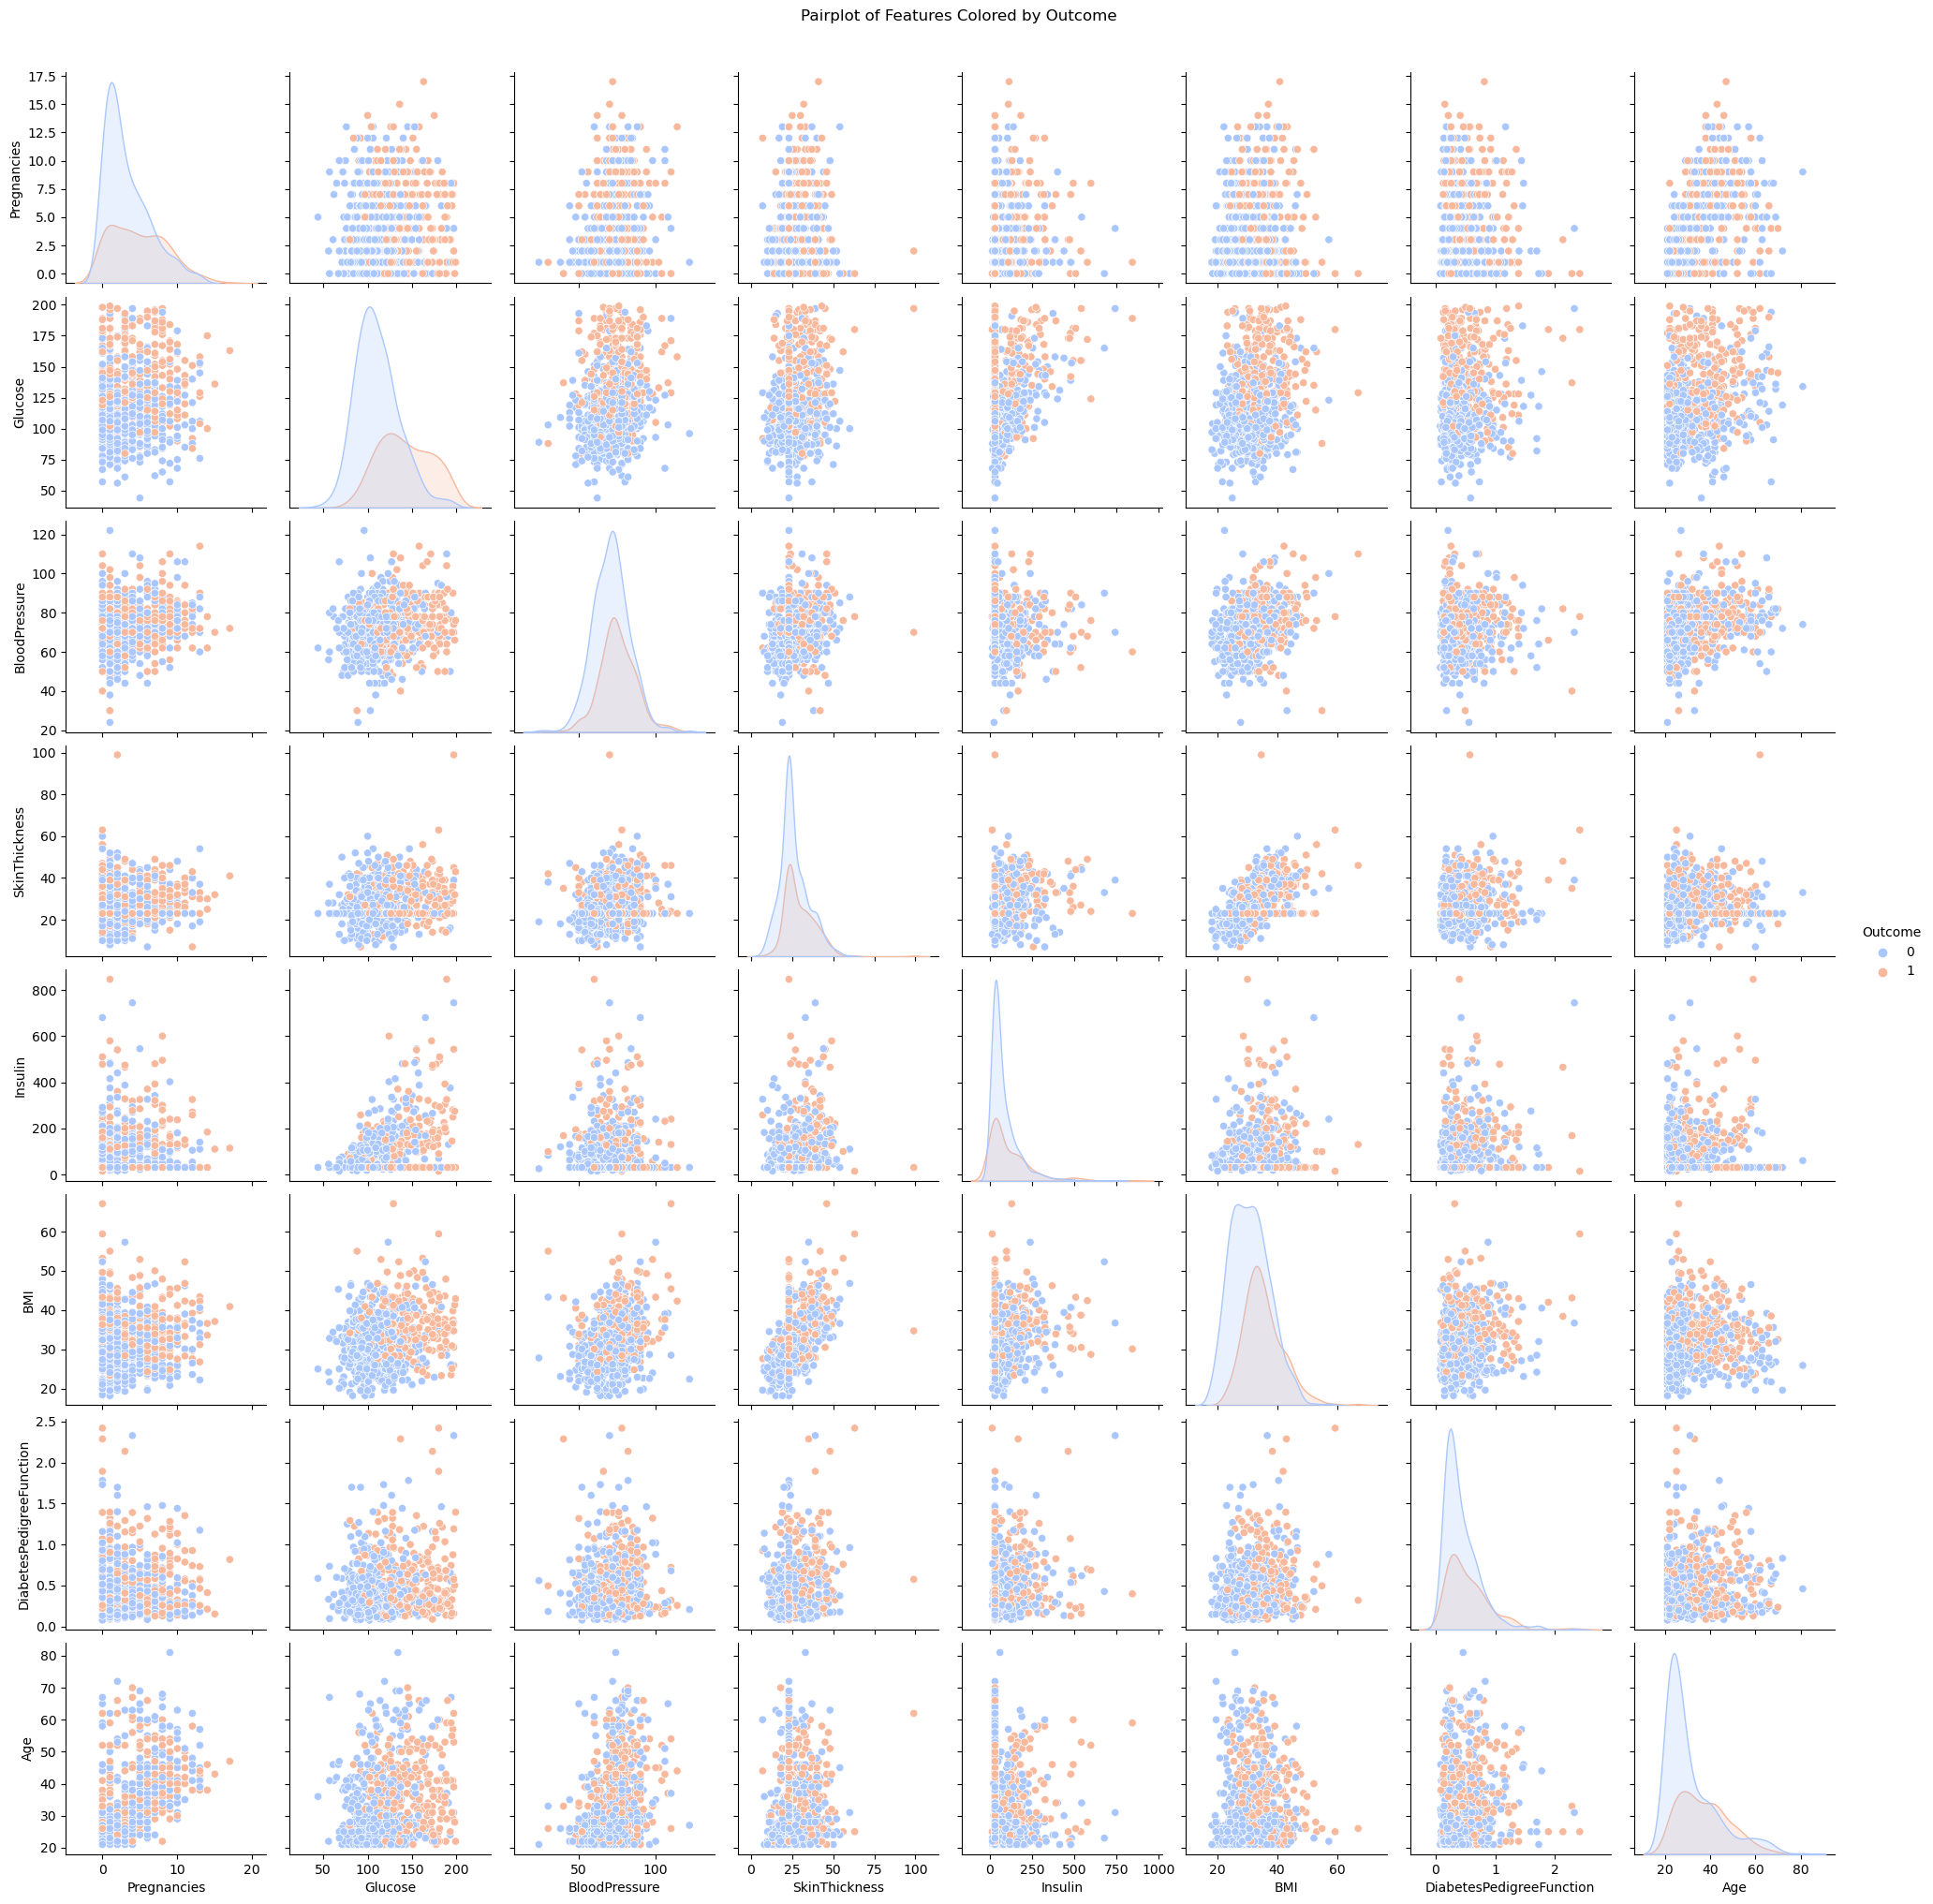

Best Learning Rate: 0.001
Test Accuracy: 0.67


In [25]:
# Step 2: Visualize each feature in the dataset including Outcome
for column in dl1.columns:  
    plt.figure(figsize=(8, 4))
    sns.histplot(dl1[column], kde=True, bins=30, color='blue')
    plt.title(f'Plot shown for Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

# Step 3: Handle missing values by replacing zeros in specific columns with the median of the column
features_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for feature in features_with_zeros:
    dl1[feature] = dl1[feature].replace(0, dl1[feature].median())

# Step 4: Display correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(dl1.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Step 5: Split data into features (X) and target (y)
X = dl1.drop('Outcome', axis=1)
y = dl1['Outcome']

# Step 6: Feature Scaling - Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Split the data into training, validation, and testing sets (60-20-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 8: Hyperparameter Tuning - Test multiple learning rates
learning_rates = [0.001, 0.01, 0.1]
val_accuracies = []

for lr in learning_rates:
    perceptron = Perceptron(max_iter=1000, eta0=lr, random_state=42)
    perceptron.fit(X_train, y_train)
    y_val_pred = perceptron.predict(X_val)
    val_accuracies.append(accuracy_score(y_val, y_val_pred))

# Step 9: Plot learning rate vs validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, val_accuracies, marker='o', linestyle='-', color='yellow')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')
plt.title('Learning Rate vs Validation Accuracy')
plt.grid(True)
plt.show()

# Step 10: Train the final Perceptron model with the best learning rate
best_lr = learning_rates[np.argmax(val_accuracies)]
perceptron = Perceptron(max_iter=1000, eta0=best_lr, random_state=42)
perceptron.fit(X_train, y_train)

# Step 11: Evaluate the model on the test set
y_test_pred = perceptron.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Step 12: Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Step 13: Plot the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Heatmap shown for Confusion Matrix')
plt.show()

# Step 14: Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', color='g')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Plot shown for ROC Curve')
plt.grid(True)
plt.show()

# Step 15: Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o', color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Step 16: Visualize pairplot to understand feature relationships
sns.pairplot(dl1, hue='Outcome', palette='coolwarm')
plt.suptitle('Pairplot of Features Colored by Outcome', y=1.02)
plt.show()

# Step 17: Output final model performance
print(f"Best Learning Rate: {best_lr}")
print(f"Test Accuracy: {test_accuracy:.2f}")